# 데이터분석
- 통합데이터를 활용하여 상관분석 진행하기

In [201]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# seaborn lib add
import seaborn as sns

from glob import glob

%matplotlib inline

import json

import warnings
warnings.filterwarnings(action = 'ignore') 


from datetime import date, datetime, timedelta
from dateutil.parser import parse

print("numpy version:",np.__version__) 
print("pandas version:",pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import sklearn
from sklearn.datasets import load_iris, load_breast_cancer

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold, cross_val_score , cross_validate,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder,StandardScaler, MinMaxScaler
import graphviz

numpy version: 1.20.1
pandas version: 1.2.4


In [95]:
# 전처리할 데이터 불러오기
total=pd.read_csv('C:/Users/whgud/TIL/team project/total_data.csv')
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410058 entries, 0 to 410057
Data columns (total 47 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   음원이미지                            410058 non-null  object 
 1   title                            410058 non-null  object 
 2   artist                           410058 non-null  object 
 3   저작권료(1주)_x                       410058 non-null  object 
 4   ymd                              410058 non-null  object 
 5   cnt_units_traded                 410058 non-null  int64  
 6   price_close                      410058 non-null  int64  
 7   pct_price_change                 410058 non-null  float64
 8   mcpi                             379419 non-null  float64
 9   mcpi_value_prev_diff             379419 non-null  float64
 10  mcpi_value_pct                   379419 non-null  float64
 11  거래가                              410058 non-null  object 
 12  저작

In [96]:
# 데이터 형변환
# ymd,저작권공표일자,pub_date, -> 날짜형
total['ymd']=pd.to_datetime(total['ymd'])
total['저작권공표일자'] =  pd.to_datetime(total['저작권공표일자'])
total['pub_date'] =  pd.to_datetime(total['pub_date'])
print("ymd dtype:",total['ymd'].dtype)
print("저작권공표일자 dtype:",total['저작권공표일자'].dtype)
print("pub_date dtype:",total['pub_date'].dtype)

ymd dtype: datetime64[ns]
저작권공표일자 dtype: datetime64[ns]
pub_date dtype: datetime64[ns]


In [97]:
# 숫자형으로 변환을 위해 , ()와 같은 특수문자 제거
total['저작권료(1주)_x'] = total['저작권료(1주)_x'].str.replace(',','')
total['저작권료(1주)_x'] = total['저작권료(1주)_x'].str.replace("\(.*\)|\s-\s.*",'')

total['저작권료_2017년'] = total['저작권료_2017년'].str.replace(',','')

total['저작권료_2018년'] = total['저작권료_2018년'].str.replace(',','')

total['저작권료_2019년'] = total['저작권료_2019년'].str.replace(',','')

total['저작권료_2020년'] = total['저작권료_2020년'].str.replace(',','')

total['방송(유무선방송, 라디오 등)'] = total['방송(유무선방송, 라디오 등)'].str.replace(',','')
total['방송(유무선방송, 라디오 등)'] = total['방송(유무선방송, 라디오 등)'].str.replace('원','')
total['방송(유무선방송, 라디오 등)'] = total['방송(유무선방송, 라디오 등)'].str.replace("\(.*\)|\s-\s.*",'')


total['전송(음원유통사, 유튜브 등)'] = total['전송(음원유통사, 유튜브 등)'].str.replace(',','')
total['전송(음원유통사, 유튜브 등)'] = total['전송(음원유통사, 유튜브 등)'].str.replace('원','')
total['전송(음원유통사, 유튜브 등)'] = total['전송(음원유통사, 유튜브 등)'].str.replace("\(.*\)|\s-\s.*",'')

total['복제(음반, 영화, 광고 등)'] = total['복제(음반, 영화, 광고 등)'].str.replace(',','')
total['복제(음반, 영화, 광고 등)'] = total['복제(음반, 영화, 광고 등)'].str.replace('원','')
total['복제(음반, 영화, 광고 등)'] = total['복제(음반, 영화, 광고 등)'].str.replace("\(.*\)|\s-\s.*",'')

total['공연(노래방, 유원시설 등)'] = total['공연(노래방, 유원시설 등)'].str.replace(',','')
total['공연(노래방, 유원시설 등)'] = total['공연(노래방, 유원시설 등)'].str.replace('원','')
total['공연(노래방, 유원시설 등)'] = total['공연(노래방, 유원시설 등)'].str.replace("\(.*\)|\s-\s.*",'')

total['해외'] = total['해외'].str.replace(',','')
total['해외'] = total['해외'].str.replace('원','')
total['해외'] = total['해외'].str.replace("\(.*\)|\s-\s.*",'')

total['기타'] = total['기타'].str.replace(',','')
total['기타'] = total['기타'].str.replace('원','')
total['기타'] = total['기타'].str.replace("\(.*\)|\s-\s.*",'')


In [98]:
# 데이터 숫자형으로 변환
# 저작권료(1주)_x, 저작권료_2017년,저작권료_2018년,저작권료_2019년,
# 저작권료_2020년,방송(유무선방송, 라디오 등),전송(음원유통사, 유튜브 등),
# 복제(음반, 영화, 광고 등),공연(노래방, 유원시설 등), 해외, 기타 -> 숫자형

total['저작권료(1주)_x']=pd.to_numeric(total['저작권료(1주)_x'])
total['저작권료_2017년']=pd.to_numeric(total['저작권료_2017년'])
total['저작권료_2018년']=pd.to_numeric(total['저작권료_2018년'])
total['저작권료_2019년']=pd.to_numeric(total['저작권료_2019년'])
total['저작권료_2020년']=pd.to_numeric(total['저작권료_2020년'])
total['방송(유무선방송, 라디오 등)']=pd.to_numeric(total['방송(유무선방송, 라디오 등)'])
total['전송(음원유통사, 유튜브 등)']=pd.to_numeric(total['전송(음원유통사, 유튜브 등)'])
total['복제(음반, 영화, 광고 등)']=pd.to_numeric(total['복제(음반, 영화, 광고 등)'])
total['공연(노래방, 유원시설 등)']=pd.to_numeric(total['공연(노래방, 유원시설 등)'])
total['해외']=pd.to_numeric(total['해외'])
total['기타']=pd.to_numeric(total['기타'])


In [99]:
# 중복되는 데이터를 가진 칼럼 삭제하기
total.drop(['저작권료(1주)_y','최근1년저작권료_1주기준','거래가','전일비'],axis=1, inplace=True)

# 저작권료(1주)_x -> 최근1년저작권료_1주 로 칼럼명 변경
total.rename(columns = {"저작권료(1주)_x": "최근1년저작권료_1주"}, inplace=True)

In [92]:
# 결측값 확인
total.isnull().sum()

음원이미지                                   0
title                                   0
artist                                  0
최근1년저작권료_1주                             0
ymd                                     0
cnt_units_traded                        0
price_close                             0
pct_price_change                        0
mcpi                                30639
mcpi_value_prev_diff                30639
mcpi_value_pct                      30639
저작권료_2017년                          54673
저작권료_2018년                          39036
저작권료_2019년                          14853
저작권료_2020년                           2730
방송(유무선방송, 라디오 등)                        0
전송(음원유통사, 유튜브 등)                        0
복제(음반, 영화, 광고 등)                        0
공연(노래방, 유원시설 등)                         0
해외                                      0
기타                                      0
저작권공표일자                                 0
작곡                                      0
작사                                

In [105]:
# 결측값 처리
# listeners,streams,instagram_artist_post_cnt, youtube_view_mean 결측치는 평균값으로 대체
total.fillna({'listeners':int(total['listeners'].mean()),
              'streams':int(total['streams'].mean()),
             'instagram_artist_post_cnt':int(total['instagram_artist_post_cnt'].mean()),
             'youtube_view_mean':int(total['youtube_view_mean'].mean())}, inplace=True)


,artist_power_digital_chart,artist_power_download_chart,artist_power_streaming_chart,artist_power_sum
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
410053,0.0,0.0,0.0,0.0
410054,0.0,0.0,0.0,0.0
410055,0.0,0.0,0.0,0.0
410056,0.0,0.0,0.0,0.0


In [110]:
# 작사, album, genre, publisher, agency, pub_date 결측값은 'NULL'로 대체
total.fillna({'작사':'NULL', 'genre':'NULL','publisher':'NULL',
             'agency':'NULL', 'pub_date':'NULL','album':'NULL'}, inplace=True)

# 그 외의 결측값은 0으로 대체
total.fillna(0,inplace=True)

In [113]:
# 결측값 확인
total.isnull().sum()

음원이미지                              0
title                              0
artist                             0
최근1년저작권료_1주                        0
ymd                                0
cnt_units_traded                   0
price_close                        0
pct_price_change                   0
mcpi                               0
mcpi_value_prev_diff               0
mcpi_value_pct                     0
저작권료_2017년                         0
저작권료_2018년                         0
저작권료_2019년                         0
저작권료_2020년                         0
방송(유무선방송, 라디오 등)                   0
전송(음원유통사, 유튜브 등)                   0
복제(음반, 영화, 광고 등)                   0
공연(노래방, 유원시설 등)                    0
해외                                 0
기타                                 0
저작권공표일자                            0
작곡                                 0
작사                                 0
편곡                                 0
저작권료 지분                            0
album                              0
g

## pairplot을 활용해 상관관계 시각화

In [163]:
# 상관관계를 보기 위해 특정 칼럼만 뽑아서 프레임 생성
# price_close와 연도별 저작권료간의 상관관계
price_copyright = total[['price_close','저작권료_2017년','저작권료_2018년','저작권료_2019년','저작권료_2020년','최근1년저작권료_1주']]

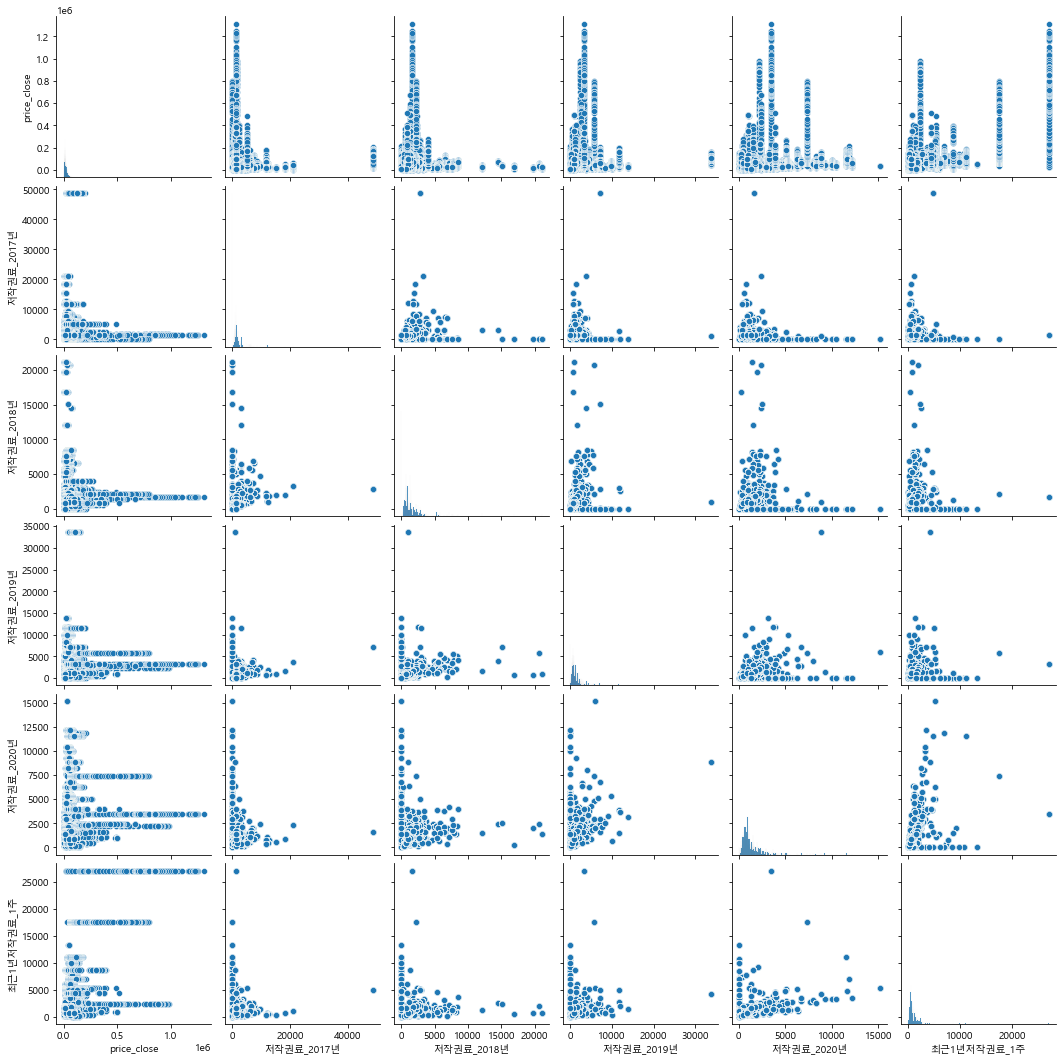

In [164]:
# price_close와 연도별 저작권료간의 상관관계를 시각화
sns.pairplot(price_copyright)
plt.show()
plt.close()

In [166]:
# price_close와 최근 1년 저작권료의 매체별 저작권료의 상관관계
price_copyright_detail = total[['price_close','방송(유무선방송, 라디오 등)','전송(음원유통사, 유튜브 등)','복제(음반, 영화, 광고 등)','공연(노래방, 유원시설 등)','해외','기타']]

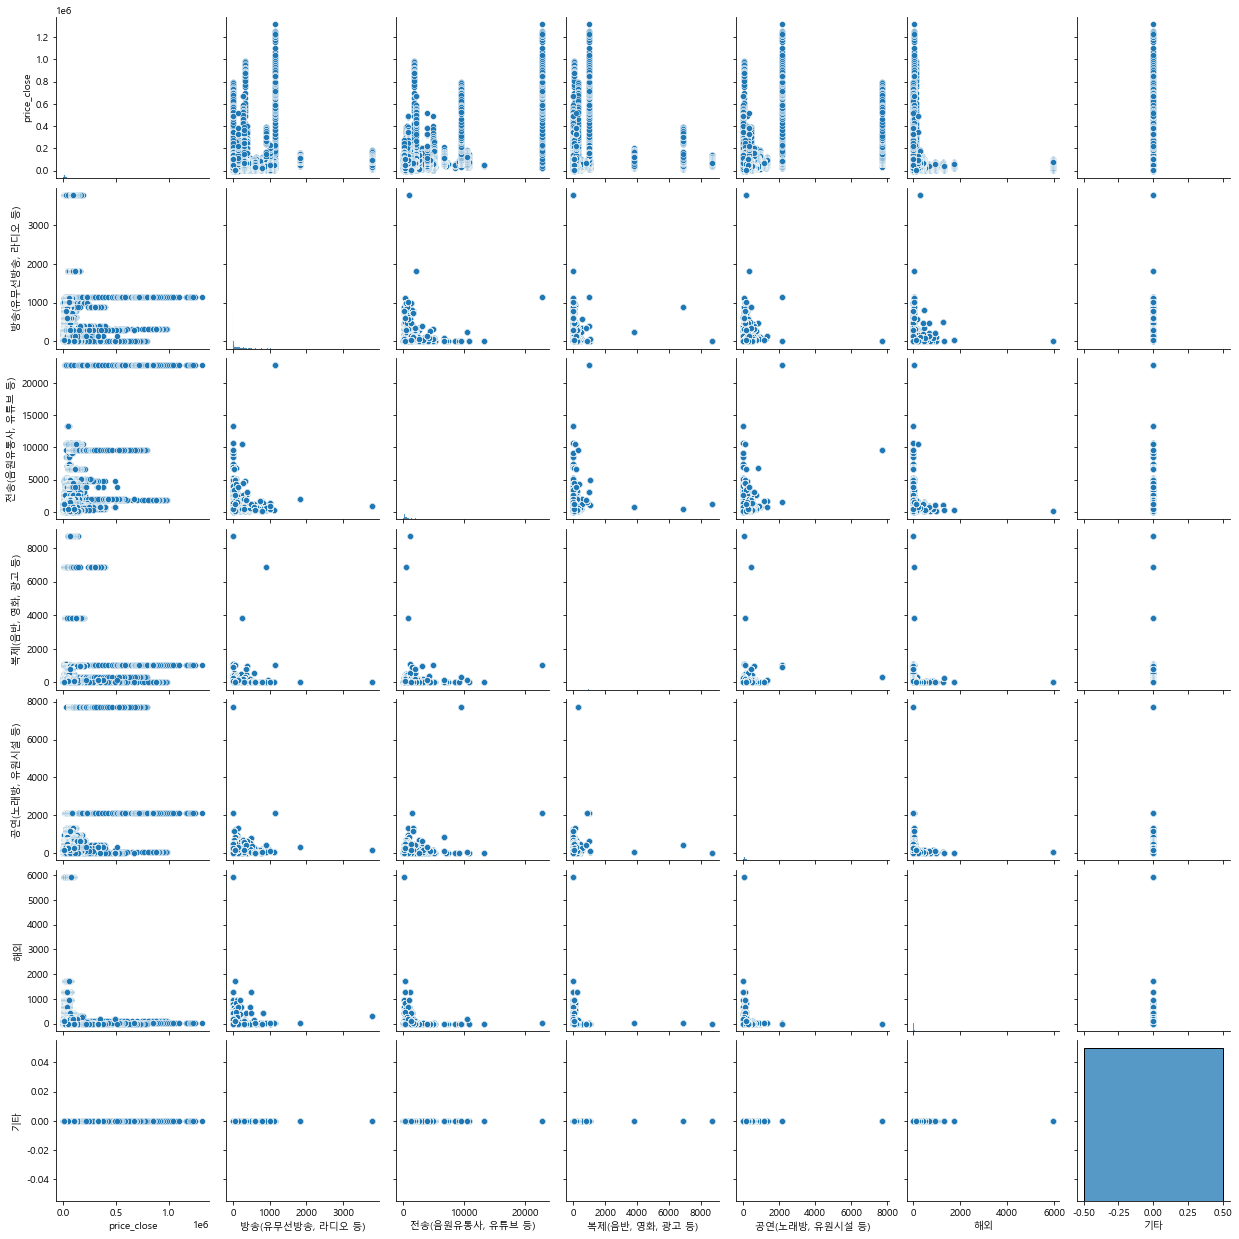

In [167]:
# price_close와 최근 1년 저작권료의 매체별 저작권료의 상관관계를 시각화
sns.pairplot(price_copyright_detail)
plt.show()
plt.close()

In [168]:
# price_close와 음원서비스 청취자수와 스트리밍수, 인스타그램 해시태그(아티스트 키워드) 게시물 수, 
# 유튜브 조회수 평균치와의 상관관계를 보기 위해 특정 칼럼만 뽑아오기
price_counts = total[['price_close','listeners','streams','instagram_artist_post_cnt','youtube_view_mean']]

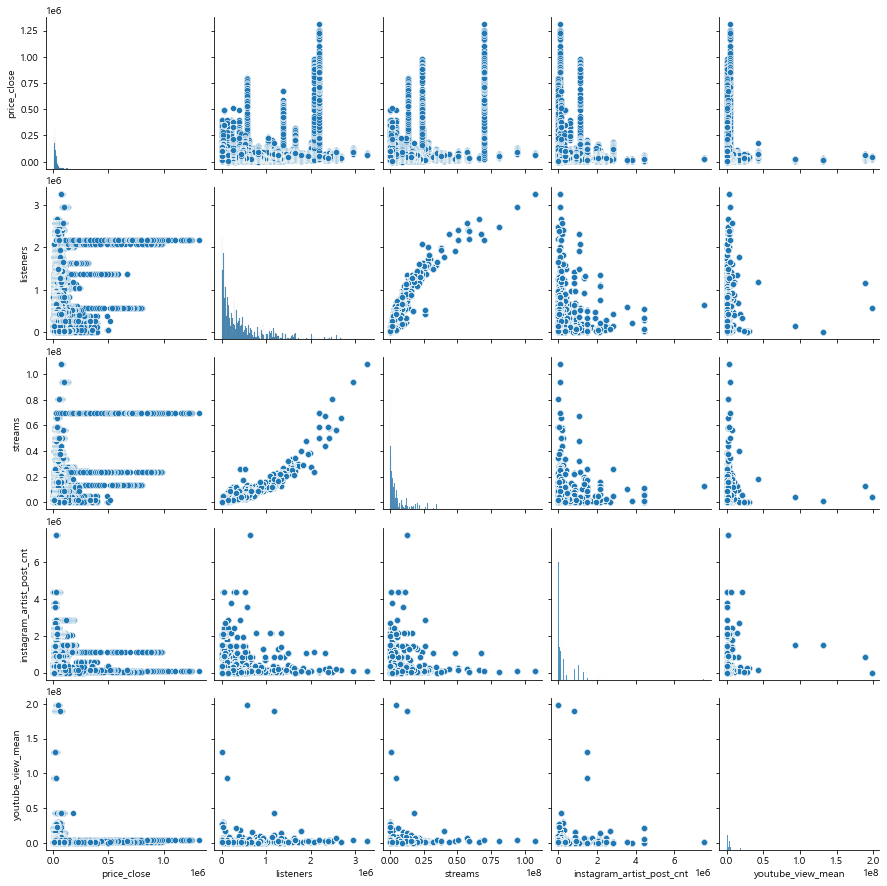

In [169]:
sns.pairplot(price_counts)
plt.show()
plt.close()

In [170]:
# price_close와 유통사파워의 상관관계를 보기 위해 특정 칼럼만 뽑아오기
price_publisher = total[['price_close','publisher_power_digital_chart','publisher_power_download_chart','publisher_power_streaming_chart','publisher_power_sum']]

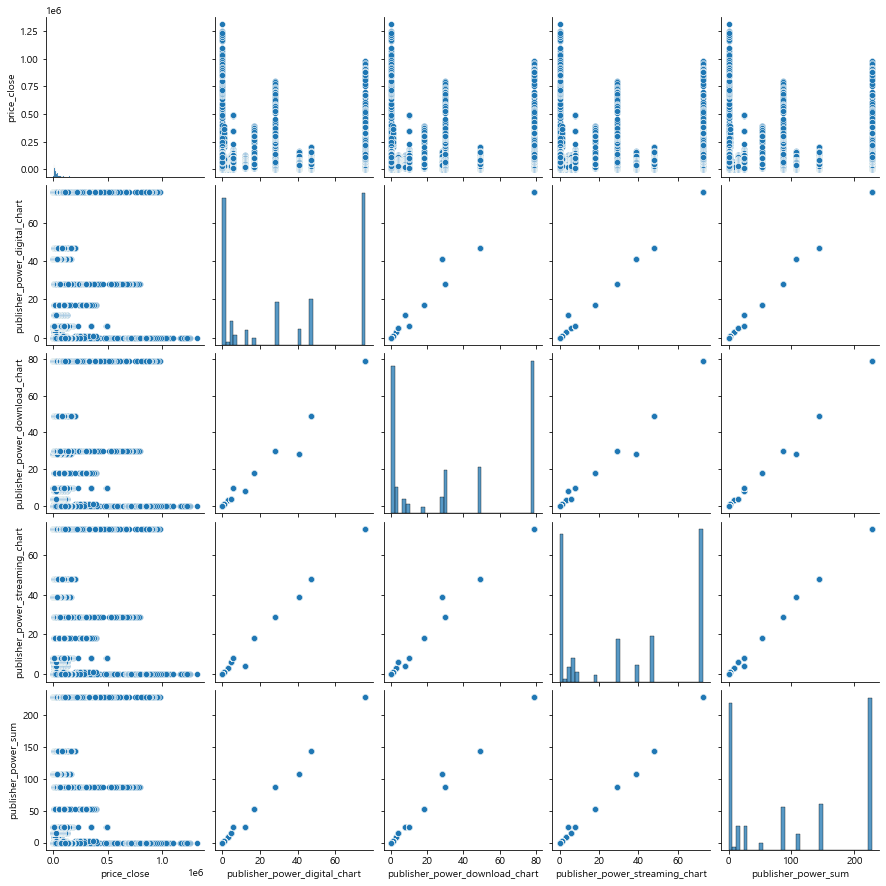

In [171]:
# price_close와 유통사파워 상관관계시각화
sns.pairplot(price_publisher)
plt.show()
plt.close()

In [172]:
# price_close와 artist power와의 상관관계를 보기 위해 특정 칼럼만 뽑아오기
price_artist = total[['price_close','artist_power_digital_chart','artist_power_download_chart','artist_power_streaming_chart','artist_power_sum']]

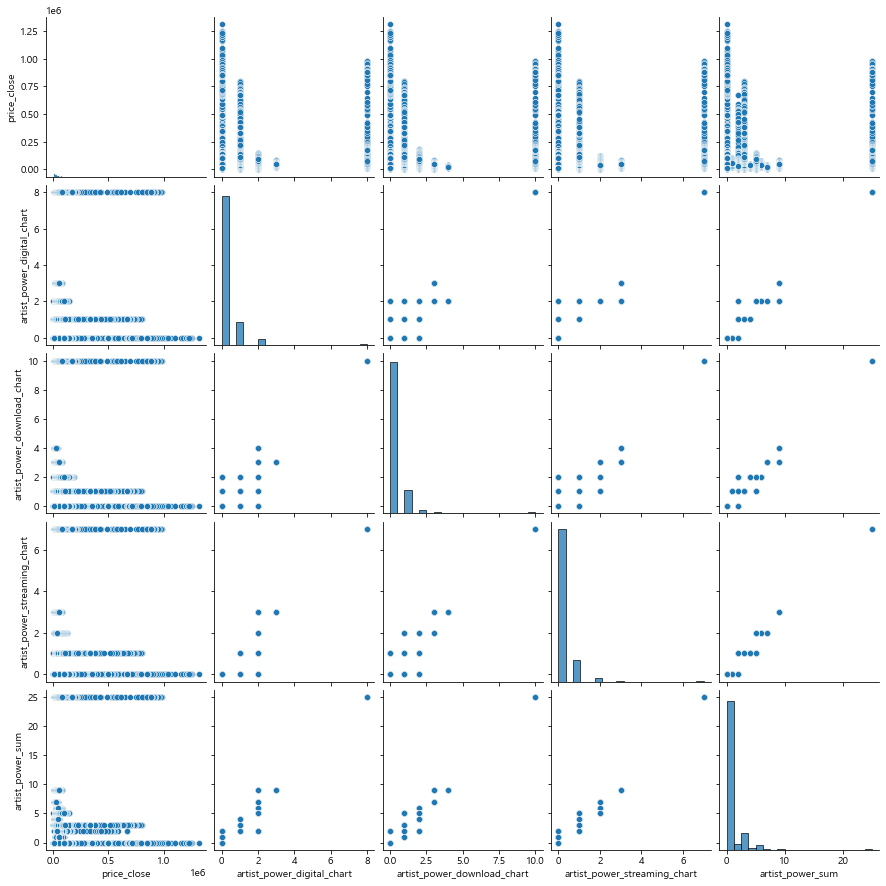

In [173]:
sns.pairplot(price_artist)
plt.show()
plt.close()

In [174]:
# price_close, mcpi, 저작권료의 상관관계
price_mcpi = total[['price_close','cnt_units_traded','mcpi','최근1년저작권료_1주']]

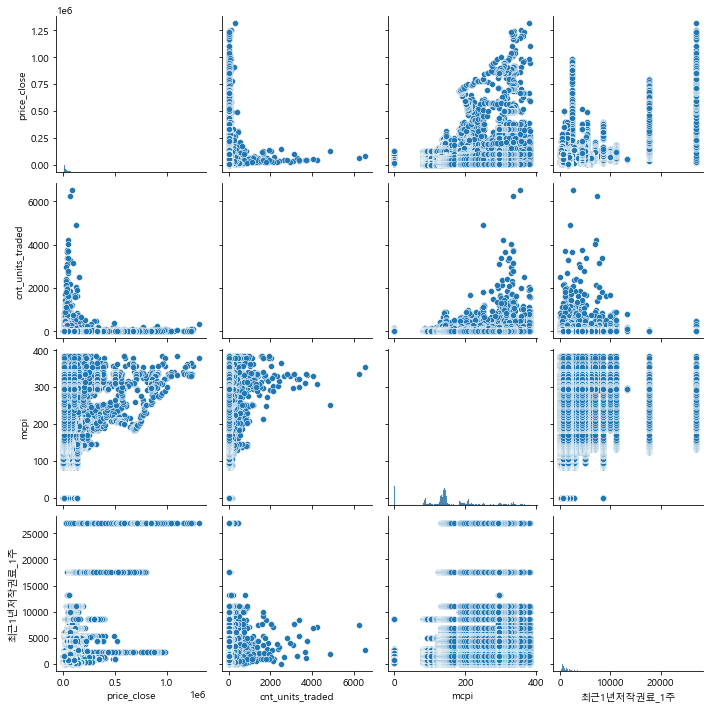

In [175]:
sns.pairplot(price_mcpi)
plt.show()
plt.close()

In [176]:
# 저작권료와 최근 1년 저작권료의 매체별 저작권료의 상관관계
copyright_media = total[['최근1년저작권료_1주','방송(유무선방송, 라디오 등)','전송(음원유통사, 유튜브 등)','복제(음반, 영화, 광고 등)','공연(노래방, 유원시설 등)','해외','기타']]

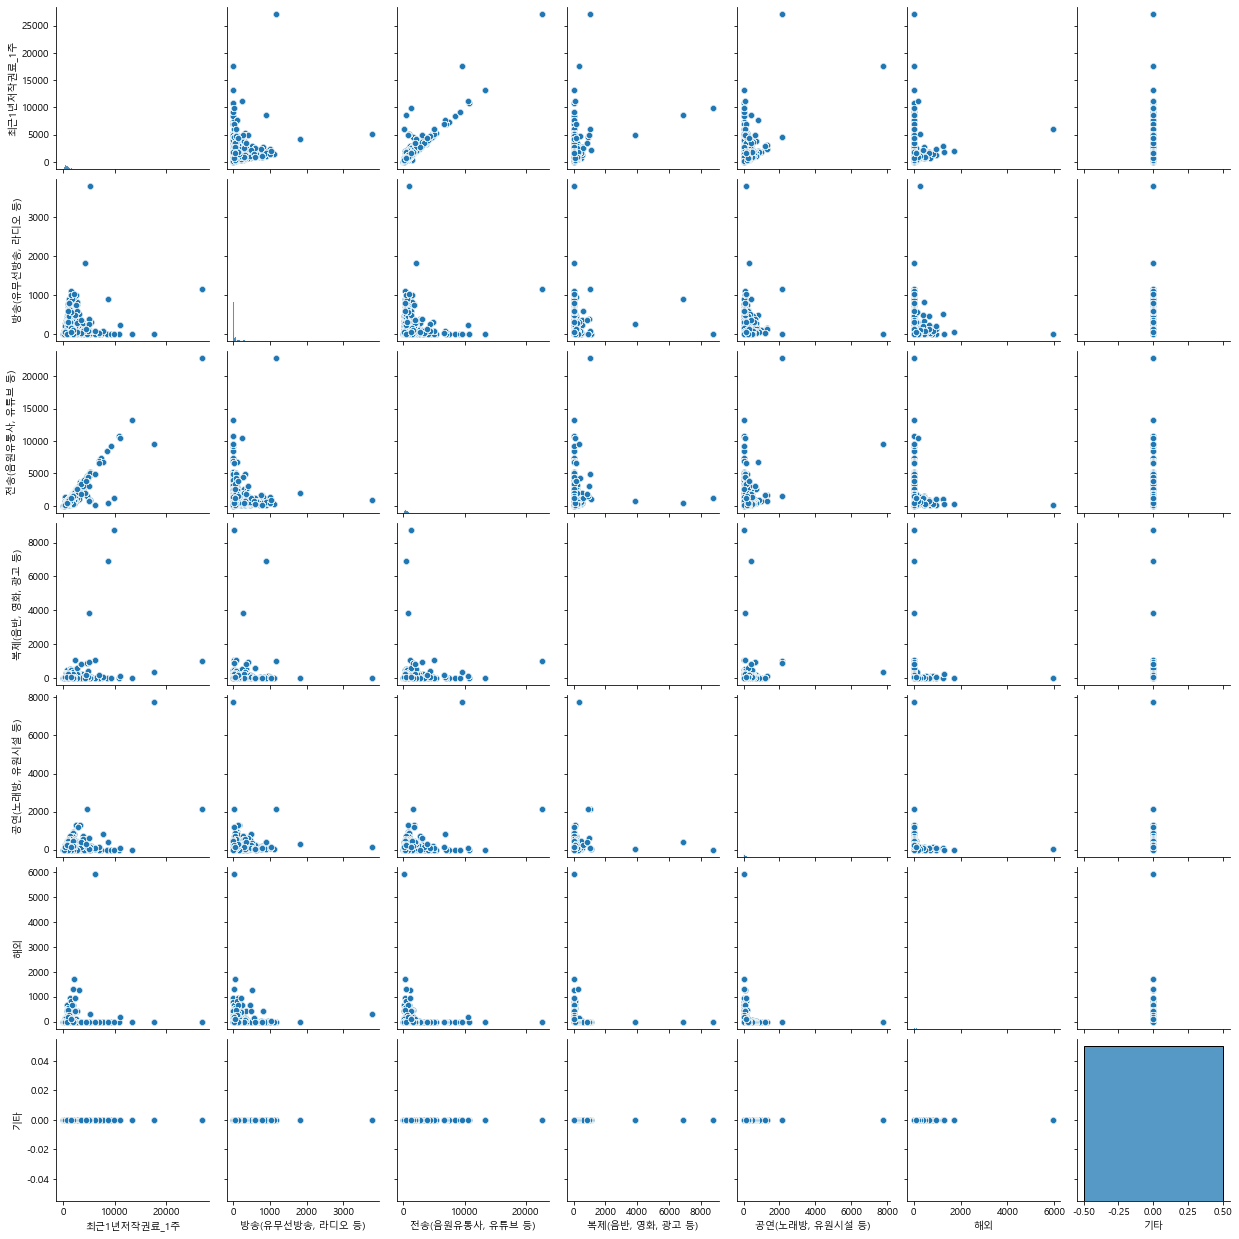

In [177]:
sns.pairplot(copyright_media)
plt.show()
plt.close()

In [178]:
# 저작권료와 음원서비스 청취자수와 스트리밍수, 인스타그램 해시태그(아티스트 키워드) 게시물 수, 
# 유튜브 조회수 평균치와의 상관관계를 보기 위해 특정 칼럼만 뽑아오기
copyright_counts = total[['최근1년저작권료_1주','listeners','streams','instagram_artist_post_cnt','youtube_view_mean']]

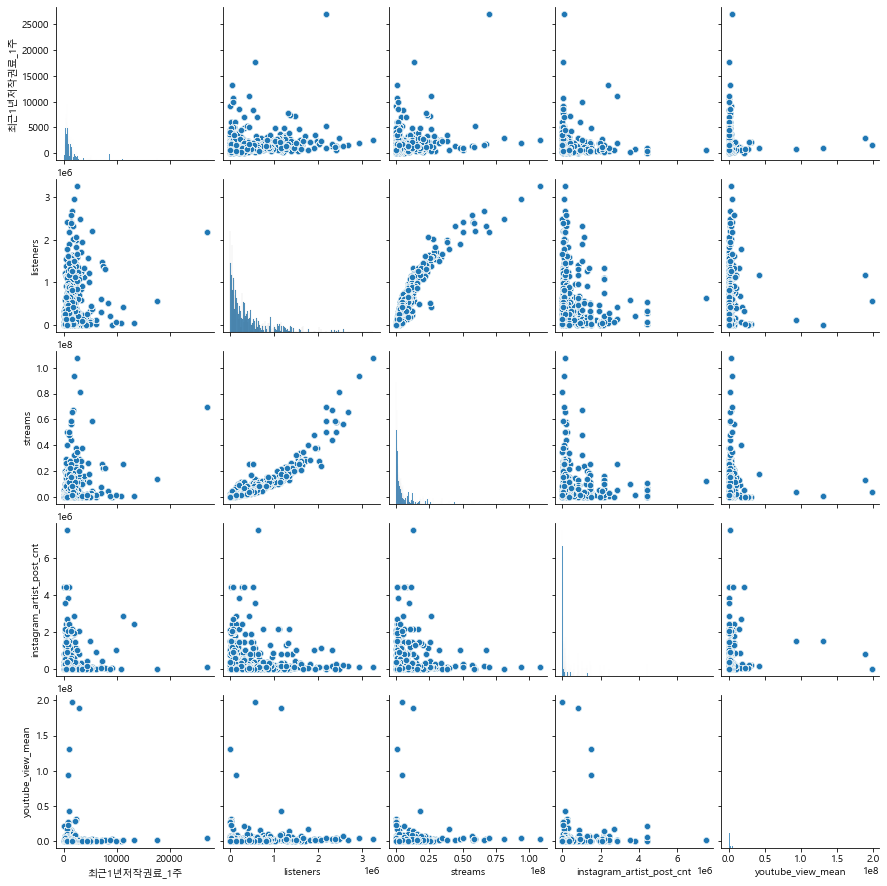

In [179]:
sns.pairplot(copyright_counts)
plt.show()
plt.close()

In [180]:
# 저작권료와 유통사파워의 상관관계를 보기 위해 특정 칼럼만 뽑아오기
copyright_publisher = total[['최근1년저작권료_1주','publisher_power_digital_chart','publisher_power_download_chart','publisher_power_streaming_chart','publisher_power_sum']]

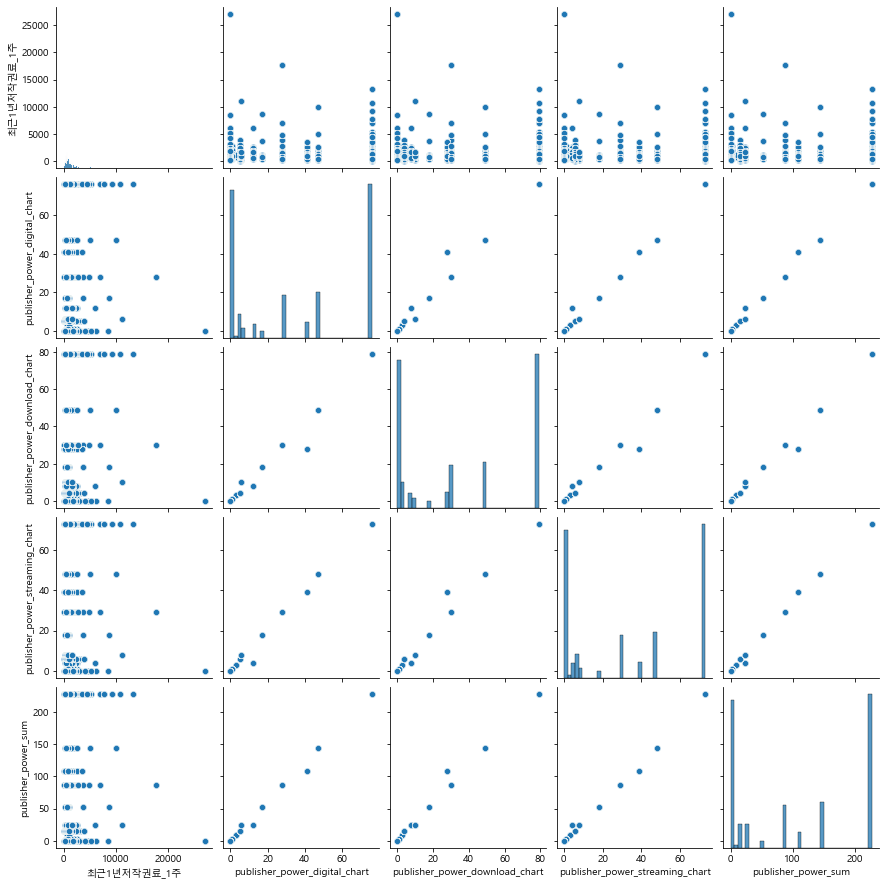

In [181]:
sns.pairplot(copyright_publisher)
plt.show()
plt.close()

In [182]:
# 저작권료와 artist power와의 상관관계를 보기 위해 특정 칼럼만 뽑아오기
copyright_artist = total[['최근1년저작권료_1주','artist_power_digital_chart','artist_power_download_chart','artist_power_streaming_chart','artist_power_sum']]

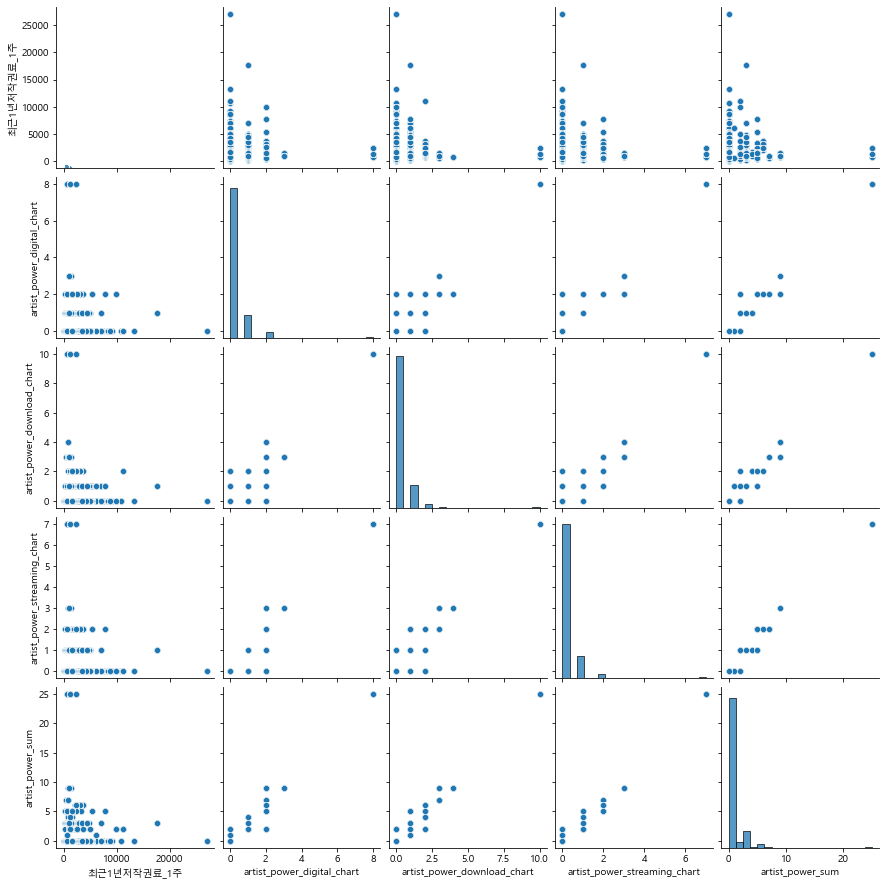

In [183]:
sns.pairplot(copyright_artist)
plt.show()
plt.close()

## 상관관계를 더 자세하게 확인해보기 위해 데이터 한번 더 전처리
## 2020년 자료만 추출해보기

In [184]:
# 2020년 자료만 추출
year_2020=(total['ymd'] >='2020-01-01') & (total['ymd']<= '2020-12-31')
filtered_2020 = total.loc[year_2020]
filtered_2020

,음원이미지,title,artist,최근1년저작권료_1주,ymd,cnt_units_traded,price_close,pct_price_change,mcpi,mcpi_value_prev_diff,...,instagram_artist_post_cnt,publisher_power_digital_chart,publisher_power_download_chart,publisher_power_streaming_chart,publisher_power_sum,artist_power_digital_chart,artist_power_download_chart,artist_power_streaming_chart,artist_power_sum,youtube_view_mean
503,https://d1z4u1c8ot3who.cloudfront.net/song/210...,혼자가 편해졌어 (Feat. 케이윌),ELSIE (은정),267,2020-06-30,0,10000,0.0,132.90,-0.09,...,150560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.302579e+06
504,https://d1z4u1c8ot3who.cloudfront.net/song/210...,혼자가 편해졌어 (Feat. 케이윌),ELSIE (은정),267,2020-07-01,8,10900,9.0,132.12,-0.78,...,150560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.302579e+06
505,https://d1z4u1c8ot3who.cloudfront.net/song/210...,혼자가 편해졌어 (Feat. 케이윌),ELSIE (은정),267,2020-07-02,7,10700,-2.0,134.38,2.26,...,150560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.302579e+06
506,https://d1z4u1c8ot3who.cloudfront.net/song/210...,혼자가 편해졌어 (Feat. 케이윌),ELSIE (은정),267,2020-07-03,6,8600,-20.0,134.17,-0.21,...,150560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.302579e+06
507,https://d1z4u1c8ot3who.cloudfront.net/song/210...,혼자가 편해졌어 (Feat. 케이윌),ELSIE (은정),267,2020-07-04,0,8600,0.0,135.21,1.04,...,150560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.302579e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409754,https://d1z4u1c8ot3who.cloudfront.net/song/210...,마녀가 된 이유,NS 윤지,1572,2020-12-27,0,10000,0.0,138.35,0.11,...,4013,6.0,10.0,8.0,24.0,0.0,0.0,0.0,0.0,5.866737e+05
409755,https://d1z4u1c8ot3who.cloudfront.net/song/210...,마녀가 된 이유,NS 윤지,1572,2020-12-28,0,10000,0.0,137.78,-0.57,...,4013,6.0,10.0,8.0,24.0,0.0,0.0,0.0,0.0,5.866737e+05
409756,https://d1z4u1c8ot3who.cloudfront.net/song/210...,마녀가 된 이유,NS 윤지,1572,2020-12-29,0,10000,0.0,136.73,-1.05,...,4013,6.0,10.0,8.0,24.0,0.0,0.0,0.0,0.0,5.866737e+05
409757,https://d1z4u1c8ot3who.cloudfront.net/song/210...,마녀가 된 이유,NS 윤지,1572,2020-12-30,0,10000,0.0,136.70,-0.03,...,4013,6.0,10.0,8.0,24.0,0.0,0.0,0.0,0.0,5.866737e+05


In [185]:
# price_close와 음원서비스 청취자수와 스트리밍수, 인스타그램 해시태그(아티스트 키워드) 게시물 수, 
# 유튜브 조회수 평균치와의 상관관계를 보기 위해 특정 칼럼만 뽑아오기
price_counts = filtered_2020[['price_close','listeners','streams','instagram_artist_post_cnt','youtube_view_mean']]


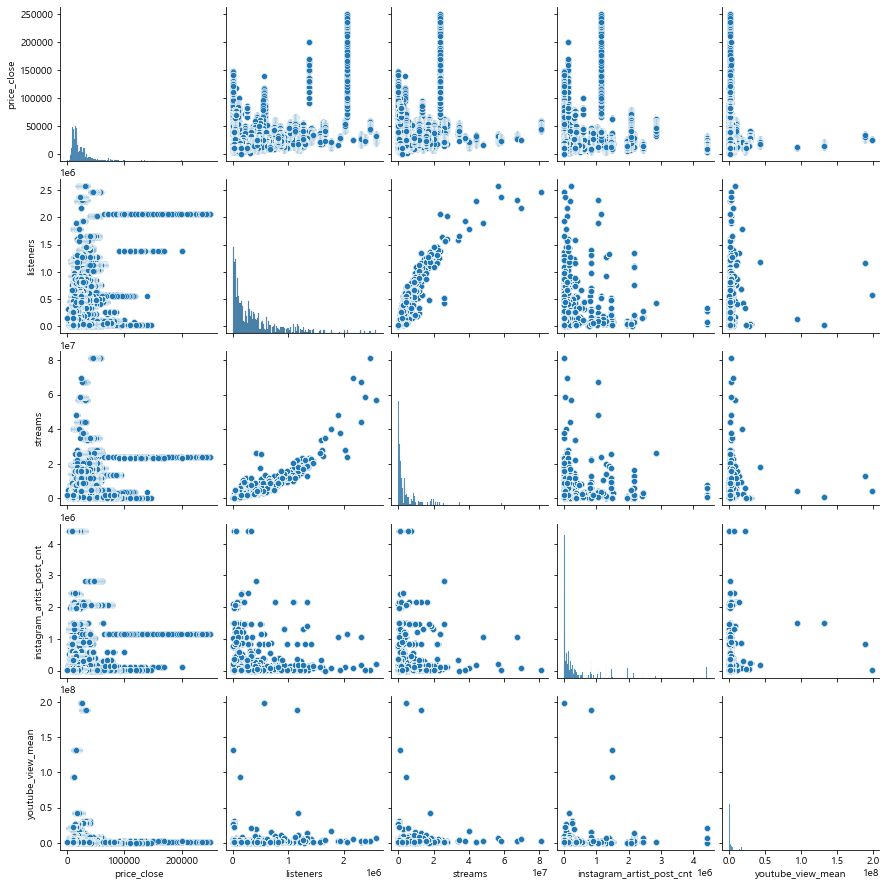

In [186]:
sns.pairplot(price_counts)
plt.show()
plt.close()

In [187]:
# price_close와 유통사파워의 상관관계를 보기 위해 특정 칼럼만 뽑아오기
price_publisher = filtered_2020[['price_close','publisher_power_digital_chart','publisher_power_download_chart','publisher_power_streaming_chart','publisher_power_sum']]

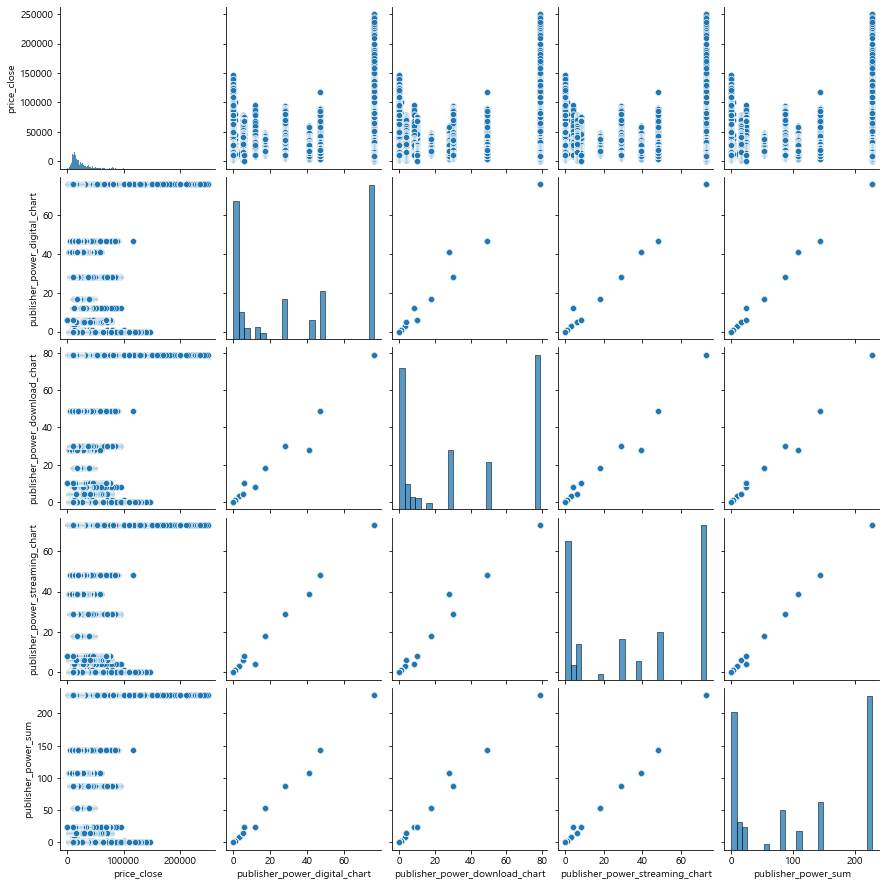

In [188]:
# price_close와 유통사파워의 상관관계를  시각화
sns.pairplot(price_publisher)
plt.show()
plt.close()

In [189]:
# price_close와 artist power와의 상관관계를 보기 위해 특정 칼럼만 뽑아오기
price_artist = filtered_2020[['price_close','artist_power_digital_chart','artist_power_download_chart','artist_power_streaming_chart','artist_power_sum']]


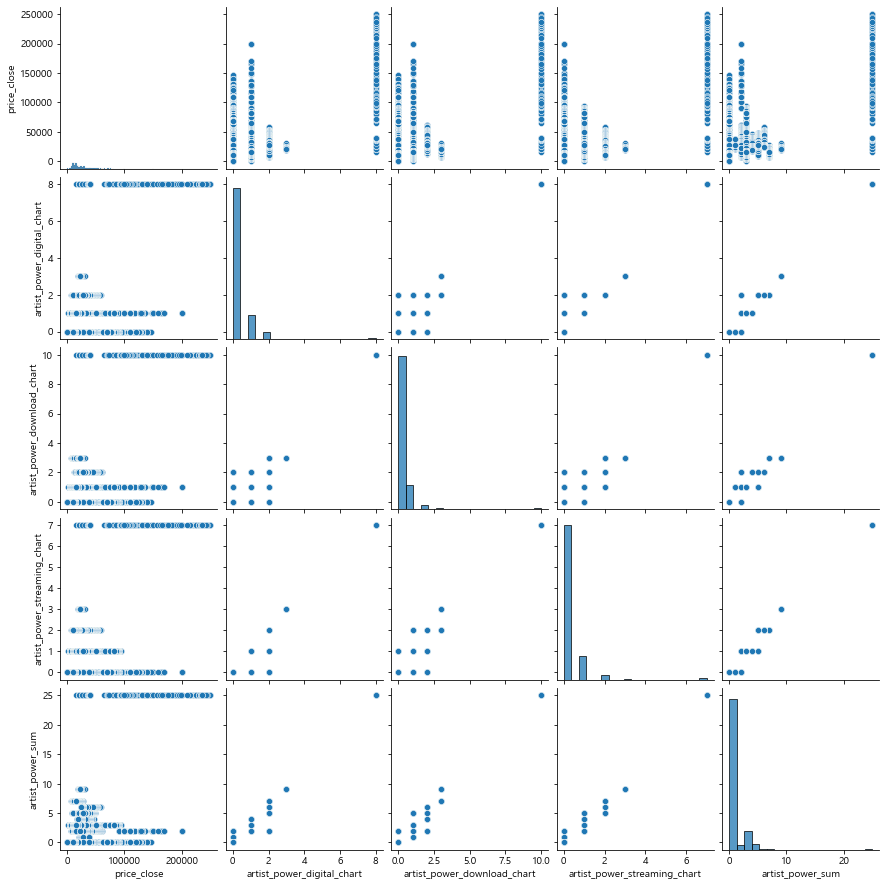

In [190]:
sns.pairplot(price_artist)
plt.show()
plt.close()

In [191]:
# price_close, mcpi, 저작권료의 상관관계
price_mcpi = filtered_2020[['price_close','cnt_units_traded','mcpi','최근1년저작권료_1주']]

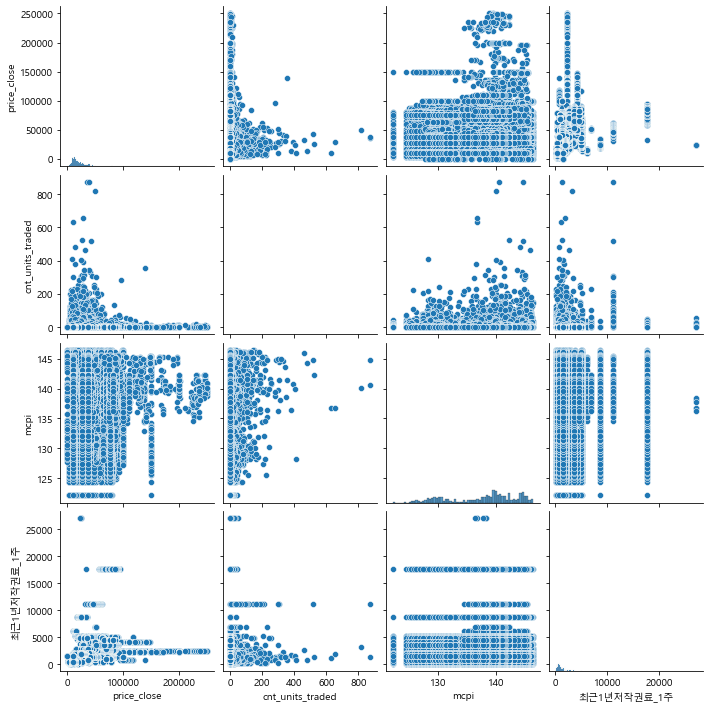

In [192]:
sns.pairplot(price_mcpi)
plt.show()
plt.close()

In [193]:
# 저작권료와 음원서비스 청취자수와 스트리밍수, 인스타그램 해시태그(아티스트 키워드) 게시물 수, 
# 유튜브 조회수 평균치와의 상관관계를 보기 위해 특정 칼럼만 뽑아오기
copyright_counts = filtered_2020[['최근1년저작권료_1주','listeners','streams','instagram_artist_post_cnt','youtube_view_mean']]

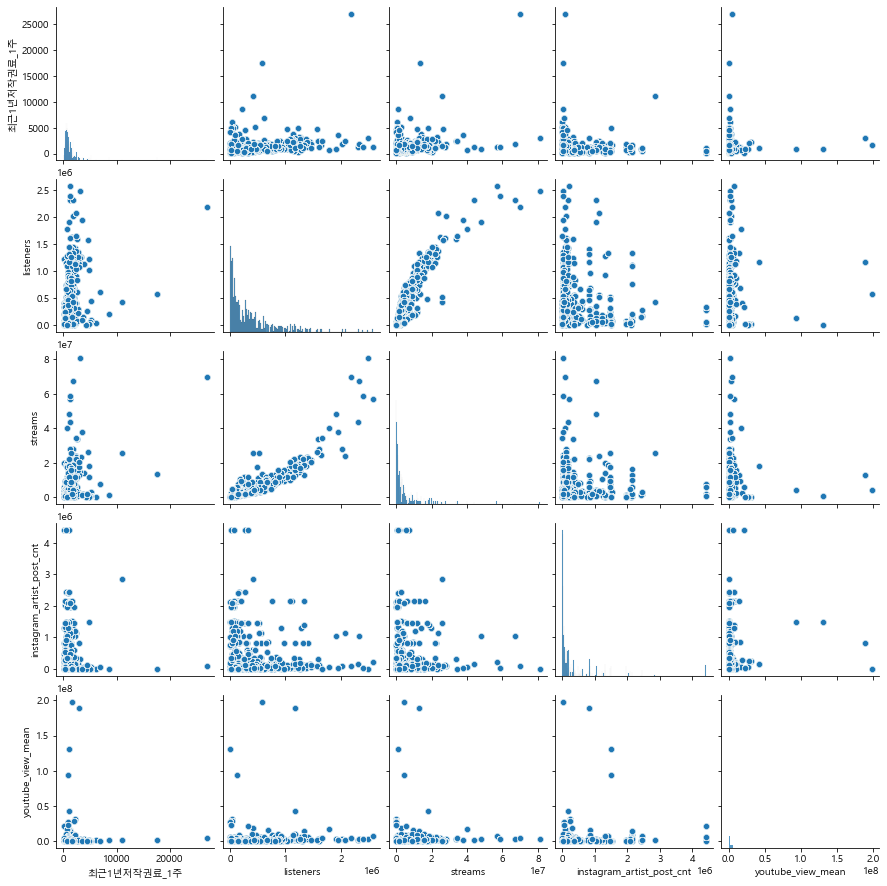

In [194]:
sns.pairplot(copyright_counts)
plt.show()
plt.close()

In [195]:
# 저작권료와 유통사파워의 상관관계를 보기 위해 특정 칼럼만 뽑아오기
copyright_publisher = filtered_2020[['최근1년저작권료_1주','publisher_power_digital_chart','publisher_power_download_chart','publisher_power_streaming_chart','publisher_power_sum']] 

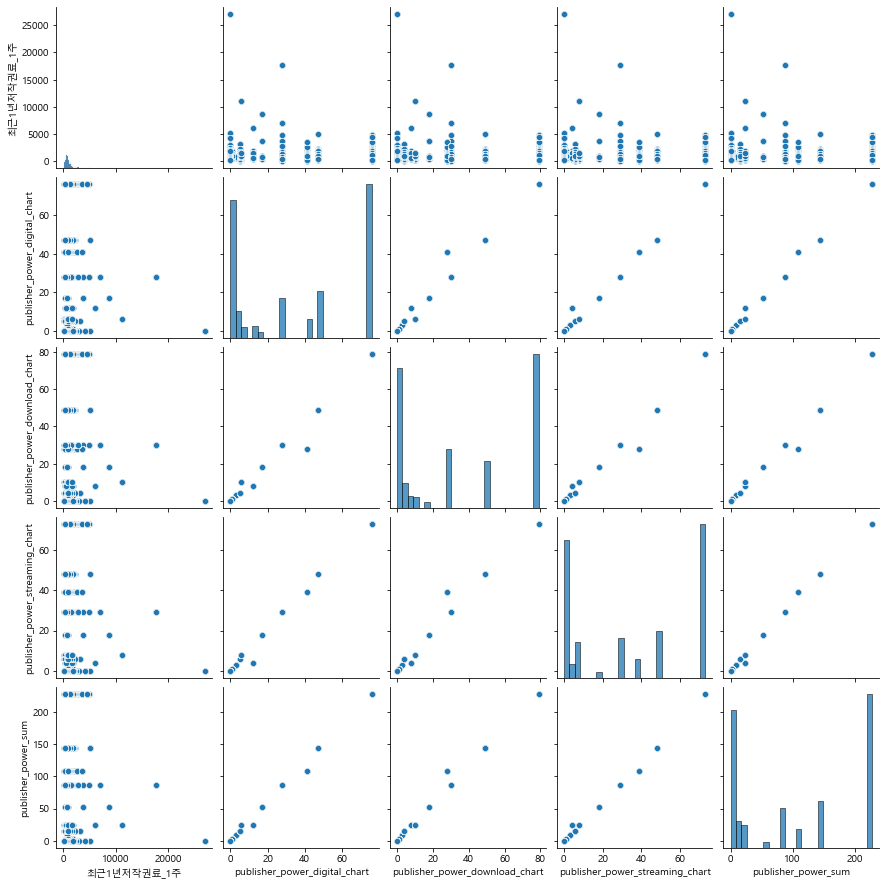

In [196]:
sns.pairplot(copyright_publisher)
plt.show()
plt.close()

In [197]:
# 저작권료와 artist power와의 상관관계를 보기 위해 특정 칼럼만 뽑아오기
copyright_artist = filtered_2020[['최근1년저작권료_1주','artist_power_digital_chart','artist_power_download_chart','artist_power_streaming_chart','artist_power_sum']]

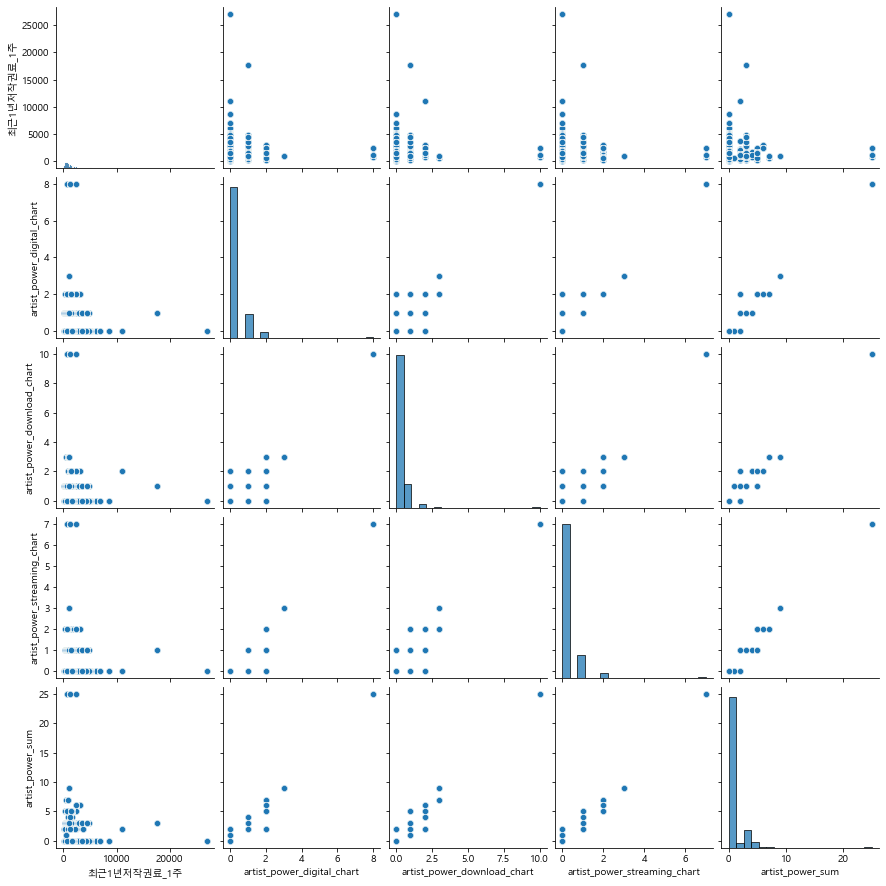

In [198]:
sns.pairplot(copyright_artist)
plt.show()
plt.close()

In [202]:
# 장르 데이터 수치형으로 변환

items=filtered_2020['genre'].unique()
# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환합니다. 
labels = labels.reshape(-1,1)
# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [203]:
filtered_2020

,음원이미지,title,artist,최근1년저작권료_1주,ymd,cnt_units_traded,price_close,pct_price_change,mcpi,mcpi_value_prev_diff,...,instagram_artist_post_cnt,publisher_power_digital_chart,publisher_power_download_chart,publisher_power_streaming_chart,publisher_power_sum,artist_power_digital_chart,artist_power_download_chart,artist_power_streaming_chart,artist_power_sum,youtube_view_mean
503,https://d1z4u1c8ot3who.cloudfront.net/song/210...,혼자가 편해졌어 (Feat. 케이윌),ELSIE (은정),267,2020-06-30,0,10000,0.0,132.90,-0.09,...,150560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.302579e+06
504,https://d1z4u1c8ot3who.cloudfront.net/song/210...,혼자가 편해졌어 (Feat. 케이윌),ELSIE (은정),267,2020-07-01,8,10900,9.0,132.12,-0.78,...,150560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.302579e+06
505,https://d1z4u1c8ot3who.cloudfront.net/song/210...,혼자가 편해졌어 (Feat. 케이윌),ELSIE (은정),267,2020-07-02,7,10700,-2.0,134.38,2.26,...,150560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.302579e+06
506,https://d1z4u1c8ot3who.cloudfront.net/song/210...,혼자가 편해졌어 (Feat. 케이윌),ELSIE (은정),267,2020-07-03,6,8600,-20.0,134.17,-0.21,...,150560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.302579e+06
507,https://d1z4u1c8ot3who.cloudfront.net/song/210...,혼자가 편해졌어 (Feat. 케이윌),ELSIE (은정),267,2020-07-04,0,8600,0.0,135.21,1.04,...,150560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.302579e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409754,https://d1z4u1c8ot3who.cloudfront.net/song/210...,마녀가 된 이유,NS 윤지,1572,2020-12-27,0,10000,0.0,138.35,0.11,...,4013,6.0,10.0,8.0,24.0,0.0,0.0,0.0,0.0,5.866737e+05
409755,https://d1z4u1c8ot3who.cloudfront.net/song/210...,마녀가 된 이유,NS 윤지,1572,2020-12-28,0,10000,0.0,137.78,-0.57,...,4013,6.0,10.0,8.0,24.0,0.0,0.0,0.0,0.0,5.866737e+05
409756,https://d1z4u1c8ot3who.cloudfront.net/song/210...,마녀가 된 이유,NS 윤지,1572,2020-12-29,0,10000,0.0,136.73,-1.05,...,4013,6.0,10.0,8.0,24.0,0.0,0.0,0.0,0.0,5.866737e+05
409757,https://d1z4u1c8ot3who.cloudfront.net/song/210...,마녀가 된 이유,NS 윤지,1572,2020-12-30,0,10000,0.0,136.70,-0.03,...,4013,6.0,10.0,8.0,24.0,0.0,0.0,0.0,0.0,5.866737e+05


In [205]:
filtered_2020['genre']

503       전체 / 가요
504       전체 / 가요
505       전체 / 가요
506       전체 / 가요
507       전체 / 가요
           ...   
409754    댄스 / 가요
409755    댄스 / 가요
409756    댄스 / 가요
409757    댄스 / 가요
409758    댄스 / 가요
Name: genre, Length: 133027, dtype: object

In [ ]:
# feature scaling 진행

In [ ]:
# 피처의 중요도를 시각화
# feature importance : 트리 분류 모델 형성에 각 특성이 얼마나 잘 작용했는지를 평가하는 지표
# 해당 지표는 0~1사이의 값을 가지며, 0이면 특성이 전혀 작용하지 않았음을 의미하고, 1은 완전하게 작용하였음을 의미
# 특성 중요도 전체의 합은 1이다.
for name, value in zip(cancer.feature_names , estimator.feature_importances_) :
    print(name, value)

sns.barplot(x = estimator.feature_importances_ , y = cancer.feature_names)